# Dataset Understanding & Exploratory Data Analysis (EDA)
This notebook explores the `application_record.csv` and `credit_record.csv` datasets.

## Step 1: Import Libraries


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno  # For missing values visualization
from scipy.stats import skew, kurtosis


In [2]:
# Display settings
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.float_format', '{:.2f}'.format)  # Reduce decimal places

## STEP 2: Load the Datasets


In [4]:
# Load application data
application_df = pd.read_csv("data_set/application_record.csv")

# Load credit history data
credit_df = pd.read_csv("data_set/credit_record.csv")

# Display first 5 rows
print("🔹 First 5 rows of Application Record:")
display(application_df.head())

print("🔹 First 5 rows of Credit Record:")
display(credit_df.head())

🔹 First 5 rows of Application Record:


,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.00,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.00
1,5008805,M,Y,Y,0,427500.00,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.00
2,5008806,M,Y,Y,0,112500.00,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.00
3,5008808,F,N,Y,0,270000.00,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.00
4,5008809,F,N,Y,0,270000.00,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.00


🔹 First 5 rows of Credit Record:


,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C


## STEP 3: Understand Dataset Structure

In [5]:
print("\n🔹 Dataset Shape:")
print(f"Application Record: {application_df.shape}")
print(f"Credit Record: {credit_df.shape}")

# Column types
print("\n🔹 Data Types:")
print(application_df.dtypes)


🔹 Dataset Shape:
Application Record: (438557, 18)
Credit Record: (1048575, 3)

🔹 Data Types:
ID                       int64
CODE_GENDER             object
FLAG_OWN_CAR            object
FLAG_OWN_REALTY         object
CNT_CHILDREN             int64
AMT_INCOME_TOTAL       float64
NAME_INCOME_TYPE        object
NAME_EDUCATION_TYPE     object
NAME_FAMILY_STATUS      object
NAME_HOUSING_TYPE       object
DAYS_BIRTH               int64
DAYS_EMPLOYED            int64
FLAG_MOBIL               int64
FLAG_WORK_PHONE          int64
FLAG_PHONE               int64
FLAG_EMAIL               int64
OCCUPATION_TYPE         object
CNT_FAM_MEMBERS        float64
dtype: object


## STEP 4: Check for Missing Values


🔹 Missing Values in Application Data:
ID                          0
CODE_GENDER                 0
FLAG_OWN_CAR                0
FLAG_OWN_REALTY             0
CNT_CHILDREN                0
AMT_INCOME_TOTAL            0
NAME_INCOME_TYPE            0
NAME_EDUCATION_TYPE         0
NAME_FAMILY_STATUS          0
NAME_HOUSING_TYPE           0
DAYS_BIRTH                  0
DAYS_EMPLOYED               0
FLAG_MOBIL                  0
FLAG_WORK_PHONE             0
FLAG_PHONE                  0
FLAG_EMAIL                  0
OCCUPATION_TYPE        134203
CNT_FAM_MEMBERS             0
dtype: int64

🔹 Missing Values in Credit Data:
ID                0
MONTHS_BALANCE    0
STATUS            0
dtype: int64


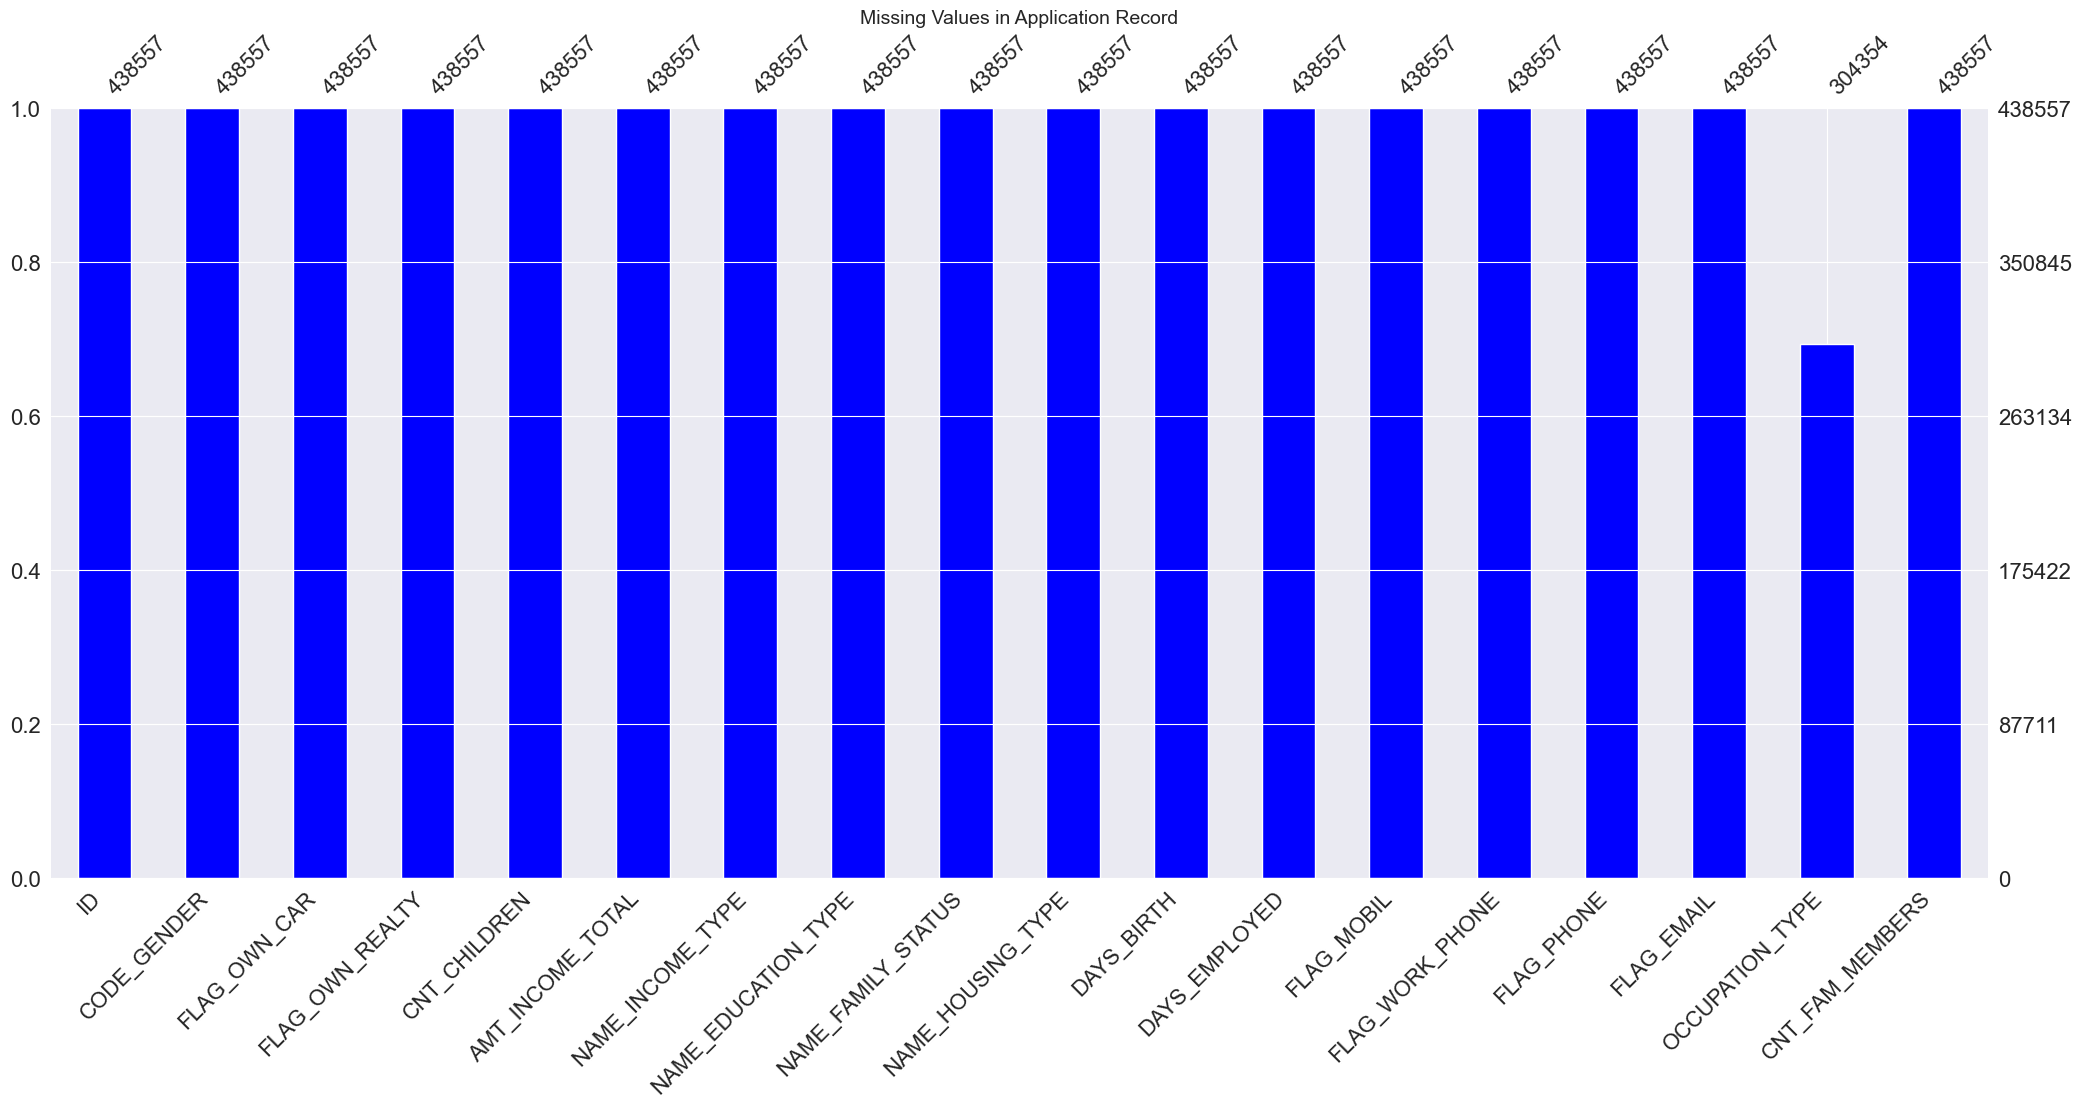

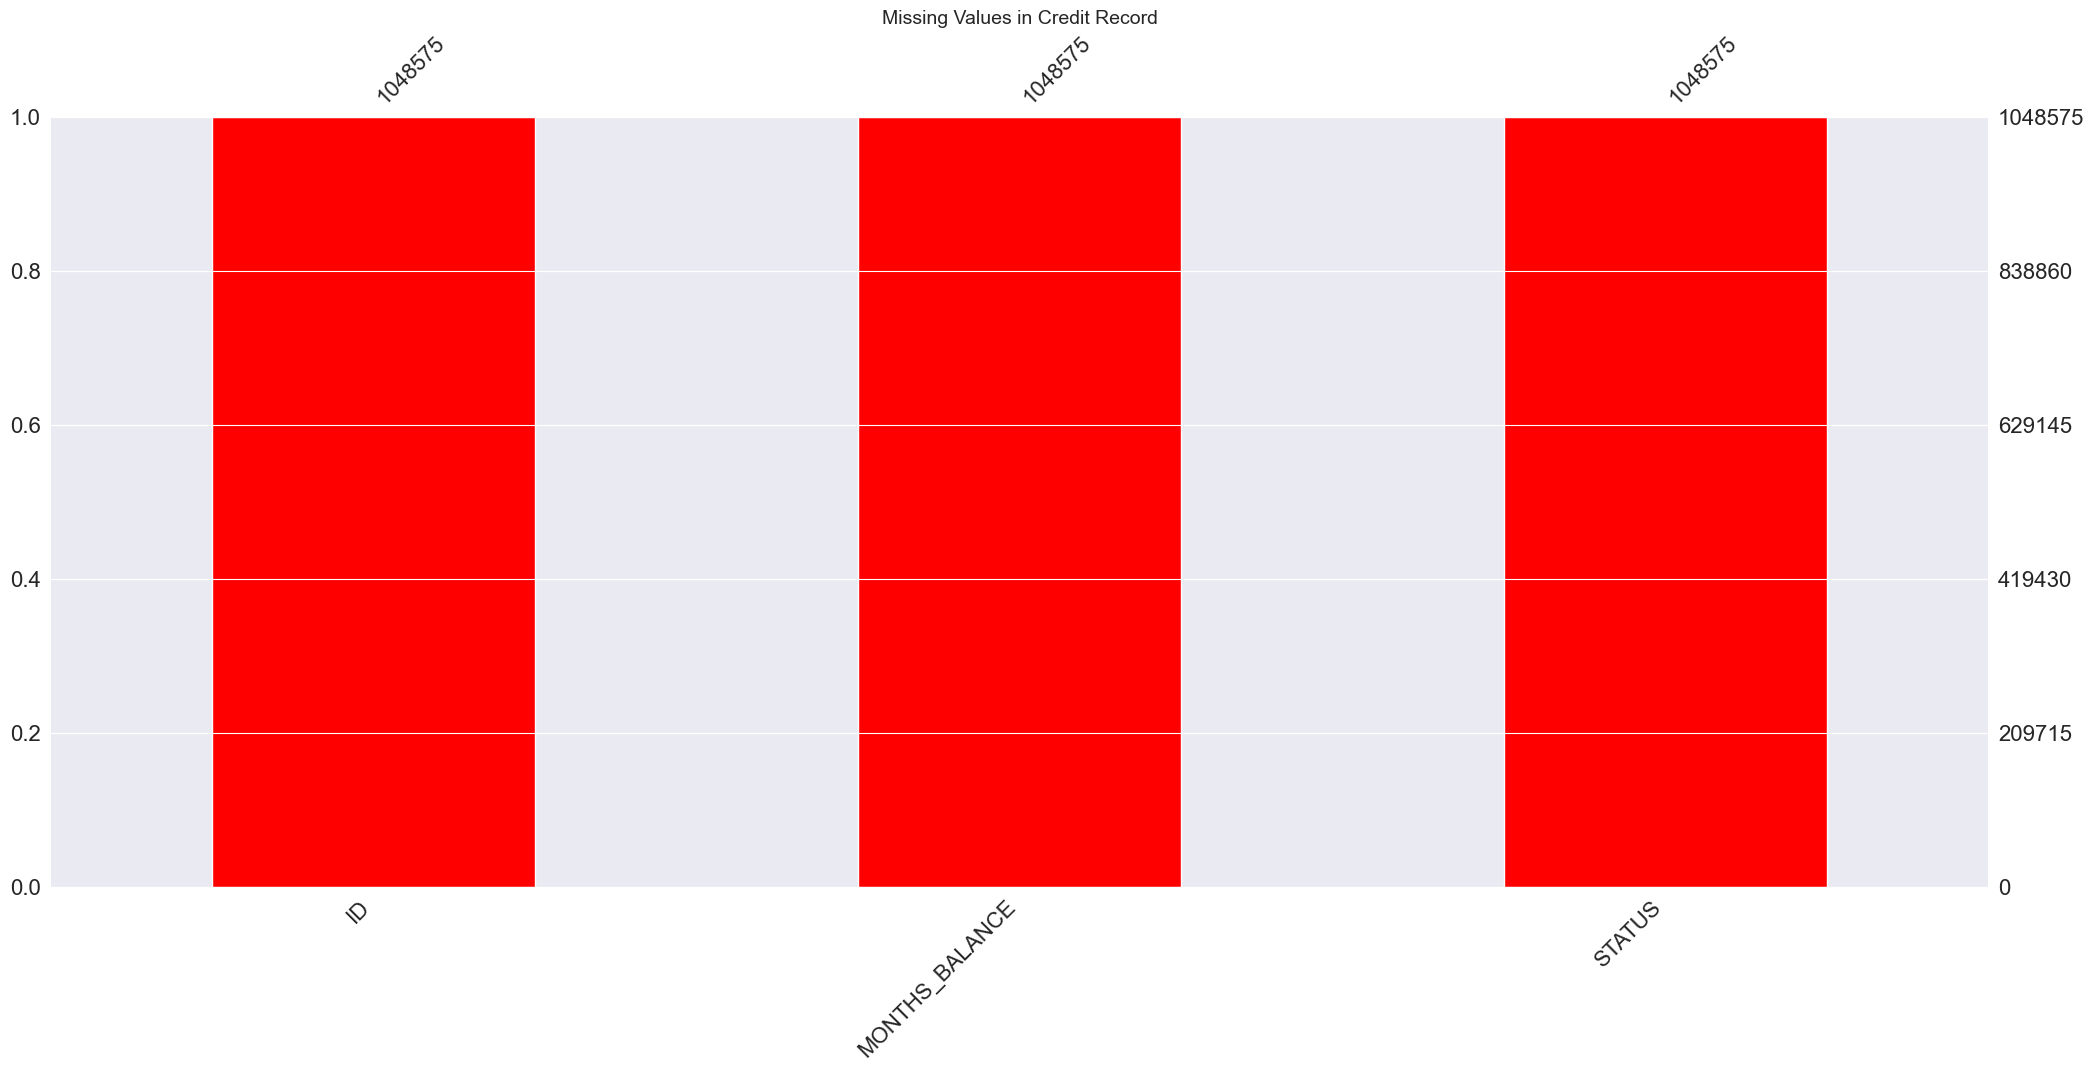

In [6]:
print("\n🔹 Missing Values in Application Data:")
print(application_df.isnull().sum())

print("\n🔹 Missing Values in Credit Data:")
print(credit_df.isnull().sum())

# Visualizing missing values
plt.figure(figsize=(12, 6))
msno.bar(application_df, color="blue")
plt.title("Missing Values in Application Record", fontsize=14)
plt.show()

plt.figure(figsize=(12, 6))
msno.bar(credit_df, color="red")
plt.title("Missing Values in Credit Record", fontsize=14)
plt.show()

## STEP 5: Statistical Summary

In [7]:
print("\n🔹 Statistical Summary of Application Data:")
print(application_df.describe())

print("\n🔹 Statistical Summary of Credit Data:")
print(credit_df.describe())


🔹 Statistical Summary of Application Data:
              ID  CNT_CHILDREN  AMT_INCOME_TOTAL  DAYS_BIRTH  DAYS_EMPLOYED  \
count  438557.00     438557.00         438557.00   438557.00      438557.00   
mean  6022176.27          0.43         187524.29   -15997.90       60563.68   
std    571637.02          0.72         110086.85     4185.03      138767.80   
min   5008804.00          0.00          26100.00   -25201.00      -17531.00   
25%   5609375.00          0.00         121500.00   -19483.00       -3103.00   
50%   6047745.00          0.00         160780.50   -15630.00       -1467.00   
75%   6456971.00          1.00         225000.00   -12514.00        -371.00   
max   7999952.00         19.00        6750000.00    -7489.00      365243.00   

       FLAG_MOBIL  FLAG_WORK_PHONE  FLAG_PHONE  FLAG_EMAIL  CNT_FAM_MEMBERS  
count   438557.00        438557.00   438557.00   438557.00        438557.00  
mean         1.00             0.21        0.29        0.11             2.19  
std       

## STEP 6: Distribution Analysis

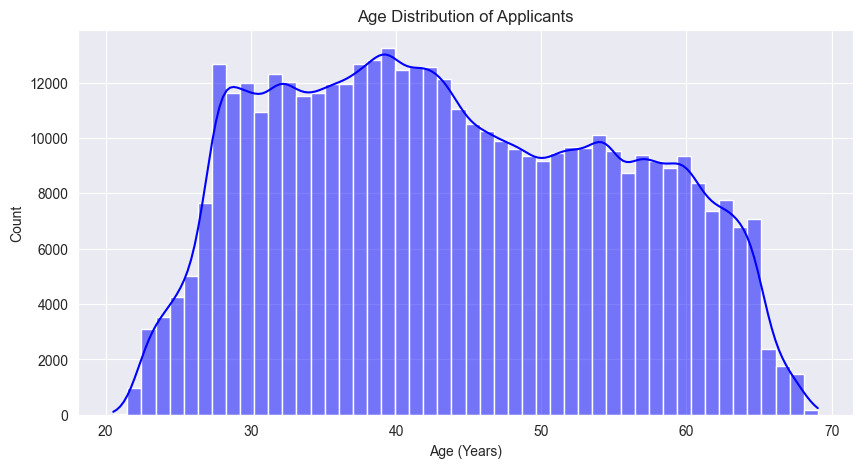

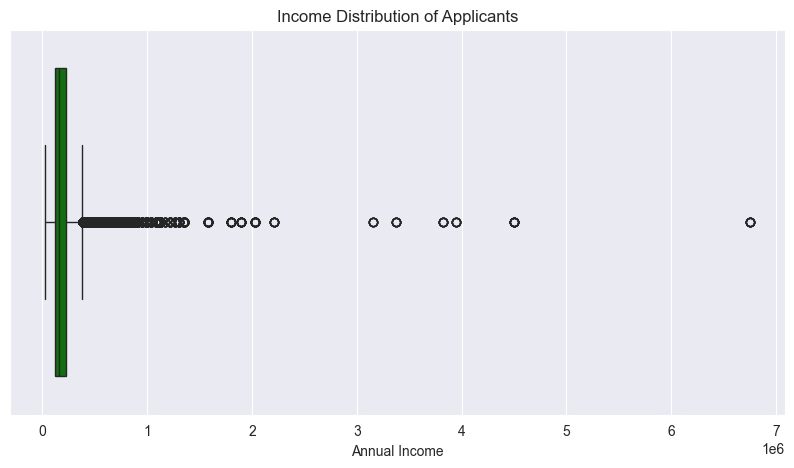

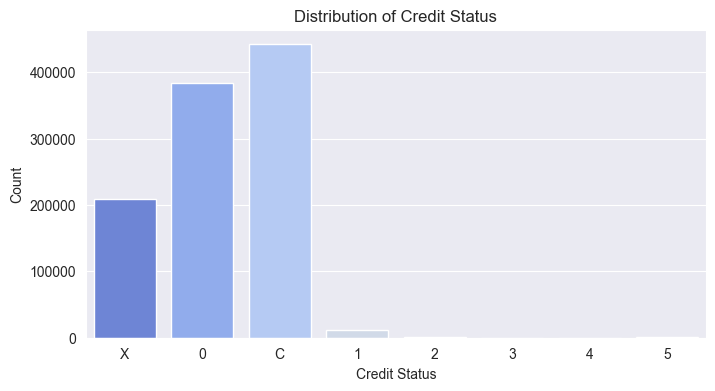

In [8]:
# Age Distribution
plt.figure(figsize=(10, 5))
sns.histplot(-application_df["DAYS_BIRTH"] / 365, bins=50, kde=True, color="blue")
plt.xlabel("Age (Years)")
plt.ylabel("Count")
plt.title("Age Distribution of Applicants")
plt.show()

# Income Distribution
plt.figure(figsize=(10, 5))
sns.boxplot(x=application_df["AMT_INCOME_TOTAL"], color="green")
plt.xlabel("Annual Income")
plt.title("Income Distribution of Applicants")
plt.show()

## Credit Status Count (Fixed for Seaborn v0.14+)
plt.figure(figsize=(8, 4))
sns.countplot(x="STATUS", data=credit_df, hue="STATUS", legend=False, palette="coolwarm")
plt.xlabel("Credit Status")
plt.ylabel("Count")
plt.title("Distribution of Credit Status")
plt.show()

## STEP 7: Correlation Analysis

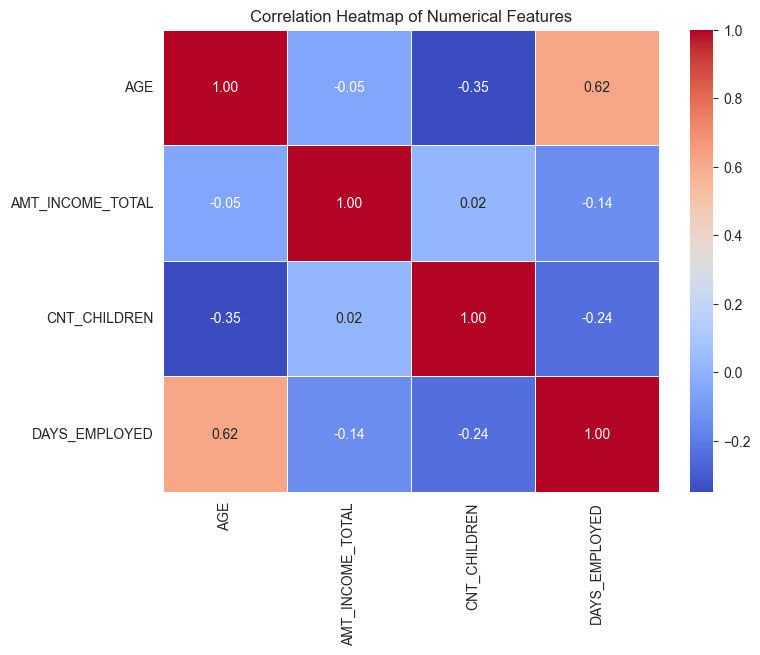

In [8]:
# Convert DAYS_BIRTH to Age
application_df["AGE"] = -application_df["DAYS_BIRTH"] / 365

# Select relevant numerical columns
numeric_cols = ["AGE", "AMT_INCOME_TOTAL", "CNT_CHILDREN", "DAYS_EMPLOYED"]

# Compute correlation
correlation_matrix = application_df[numeric_cols].corr()

# Plot correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Numerical Features")
plt.show()

## STEP 8: Categorical Feature Analysis

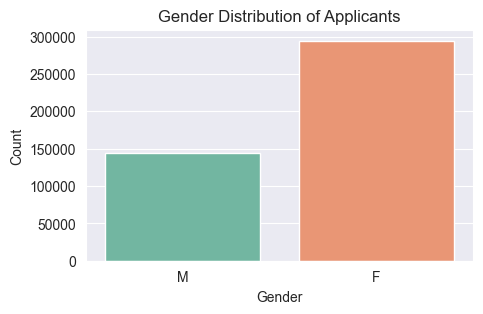

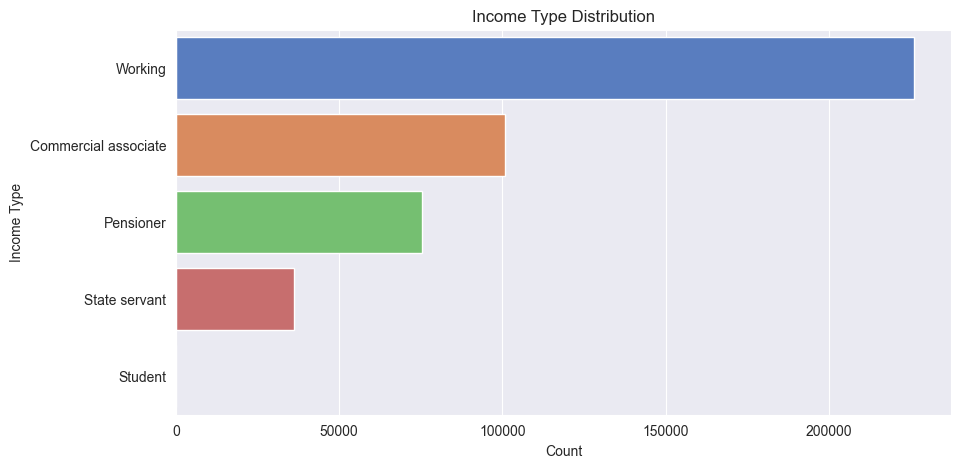

In [12]:
# Gender Distribution (Fixed)
plt.figure(figsize=(5, 3))
sns.countplot(x="CODE_GENDER", data=application_df, hue="CODE_GENDER", legend=False, palette="Set2")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.title("Gender Distribution of Applicants")
plt.show()

# Income Type Distribution (Fixed)
plt.figure(figsize=(10, 5))
sns.countplot(y="NAME_INCOME_TYPE", data=application_df, hue="NAME_INCOME_TYPE", legend=False,
              order=application_df["NAME_INCOME_TYPE"].value_counts().index, palette="muted")
plt.ylabel("Income Type")
plt.xlabel("Count")
plt.title("Income Type Distribution")
plt.show()

## STEP 9: Skewness & Outliers Detection


🔹 Skewness of Numerical Features:
AGE: Skewness = 0.16
AMT_INCOME_TOTAL: Skewness = 8.83
CNT_CHILDREN: Skewness = 1.81
DAYS_EMPLOYED: Skewness = 1.74


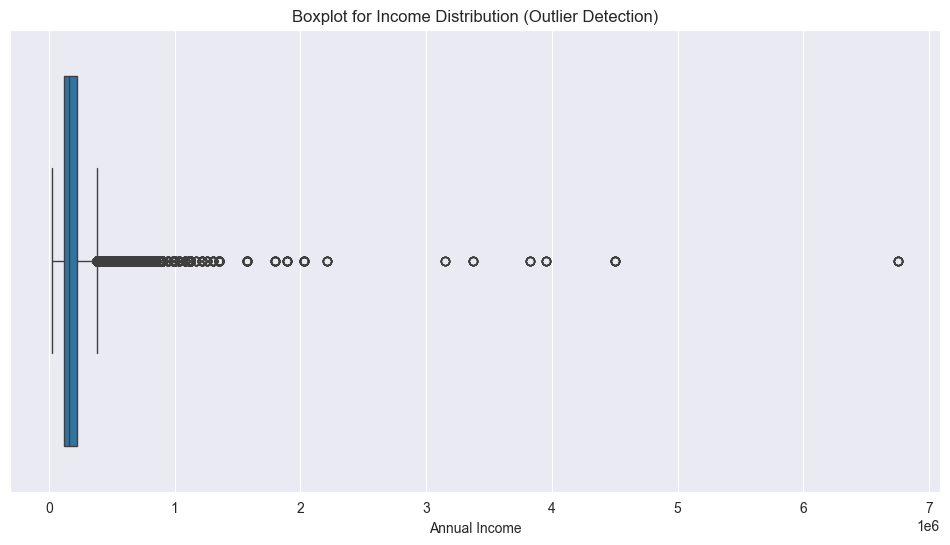

In [10]:
print("\n🔹 Skewness of Numerical Features:")
for col in numeric_cols:
    print(f"{col}: Skewness = {skew(application_df[col].dropna()):.2f}")

# Boxplot to detect outliers
plt.figure(figsize=(12, 6))
sns.boxplot(x=application_df["AMT_INCOME_TOTAL"])
plt.xlabel("Annual Income")
plt.title("Boxplot for Income Distribution (Outlier Detection)")
plt.show()

## STEP 10: Insights & Next Steps

In [11]:
print("\n🔹 Insights from Data Exploration:")
print("- Majority of applicants are between 30-50 years old.")
print("- Income distribution is right-skewed, meaning a few people have very high incomes.")
print("- Most applicants have a stable income type (Working or Commercial Associate).")
print("- There are missing values in some categorical fields that require imputation.")
print("- Some features (like income) have outliers that should be handled before ML training.")

print("\n✅ Data Exploration Complete! Ready for ETL Process.")


🔹 Insights from Data Exploration:
- Majority of applicants are between 30-50 years old.
- Income distribution is right-skewed, meaning a few people have very high incomes.
- Most applicants have a stable income type (Working or Commercial Associate).
- There are missing values in some categorical fields that require imputation.
- Some features (like income) have outliers that should be handled before ML training.

✅ Data Exploration Complete! Ready for ETL Process.


## Summary
- **Gender**: Distribution between male and female applicants.
- **Income**: Most applicants earn below 1,000,000 per year.
- **Credit Status**: Majority of applicants have no overdue payments.
- **Education & Income**: Higher education levels tend to correlate with higher income.

This concludes the **exploratory data analysis** for the dataset.
